Задачи проекта:

Приоритизация гипотез
- Применить фреймворк ICE к гипотезам
- Применить фреймворк RICE к гипотезам
- Сравнить полученные рузальтаты

Анализ А/В теста
- Построить график кумулятивной выручки по группам
- Построить график кумулятивного среднего чека по группам
- Построить график относительного изменения кумулятивного среднего чека группы В к группе А
- Построить график кумулятивной конверсии по группам
- Построить график относительного изменения кумулятивной конверсии группы В к группе А
- Построить точечный график количества заказов по пользователям
- Посчитать 95 и 99 персентили количества заказов на пользователя и определить границу аномальных пользователей
- Построить точечный график стоимостей заказов
- Посчитать 95 и 99 персентили стоимости заказов и определить границу аномальных пользователей
- Посчитать статистичкскую значимость различий в конверсии между группами по "сырым" данным
- Посчитать статистичкскую значимость различий в среднем чеке между группами по "сырым" данным
- Посчитать статистичкскую значимость различий в конверсии между группами по чистым данным
- Посчитать статистичкскую значимость различий в среднем чеке между группами по чистым данным
- Сделать выводы и принять решение

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings

### Приоритизация гипотез <a id="step1"></a>

Перез применением фреймворков прочитаем данные в таблице и ознакомимся с информацией

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Применить фреймворк ICE <a id="step2"></a>

Рассчитаем фреймворк ICE. Для этого, воспользуемся формулой Impact * Confidence / Efforts

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [5]:
hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Фреймворк указал на максимальную пользу гипотезы 8, которая набрала 16.2 балла. Также стоит обратить внимание на гипотезы 0 и 7 с 13.33 и 11.2 баллов соответственно. Гипотезы 5, 3 и 4 показали наименьшую пользу для бизнеса.

#### Применить фреймворк RICE <a id="step3"></a>

Теперь рассчитаем фреймворк RICE по формуле Reach * Impact * Confidence / Efforts

In [6]:
hypothesis['RICE'] = (
    hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [7]:
hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Рассчет фреймворка RICE показал, что наиболее эффективно будет в первую очередь рассмотреть гипотезу 7. Гипотезы 2, 0 и 6 не столь привлекательны для бизнеса в данный момент

#### Сравнить результаты <a id="step4"></a>

Таким образом, мы получили следующие результаты:
1. Согласно фреймворку ICE наилучшей для проверки является 8 гипотеза;
2. Фреймворк RICE указывает, что наилучшей для проверки будет 7 гипотеза;

Изменение в приоретизации гипотез вызвано параметром охвата пользователей - Reach. Так, гипотеза, в которой тестируется добавление форм подписок на страницы магазина охватывает всех посетителей сайта. При этом, гипотеза, которая была наилучшей с позиции фреймворка ICE - запуск скидочных акций на товары, практически не охватывает пользовательскую аудиторию сайта. 

В зависимости от типа бизнеса и проверяемых гипотез на два фреймворка стоит смотреть по разному. Так, в случае с интернет-магазином и гипотезами, направленными на улучшение пользовательского опыта - лучше использовать фреймворк RICE

### Анализ А/В теста <a id="step5"></a>

Прочитаем данные и убедимся в их готовности к тесту

In [8]:
orders = pd.read_csv('/datasets/orders.csv')

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 1197 записей. Пропуски отсутствуют, для перепроверки удалим дубликаты

In [12]:
orders = orders.drop_duplicates()

In [13]:
orders['revenue'].describe().round(2)

count       1197.00
mean        8348.01
std        39191.13
min           50.00
25%         1220.00
50%         2978.00
75%         8290.00
max      1294500.00
Name: revenue, dtype: float64

In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Данные в таблице orders не требют предварительной подготовки. Формат данных в столбце date изменен

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors = visitors.drop_duplicates()

In [18]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Таблица visitors готова. Пропуски отсутствуют, дубликатов нет. Данные в столбце date подготовлены

#### Построить график кумулятивной выручки по группам <a id="step6"></a>

Выделим из данных таблицы orders группы А и В и по каждой рассчитаем кумулятивную выручку

In [19]:
orders_a_daily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue':'sum'})
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

In [20]:
orders_a_cumulative = orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg({
    'date':'max',
    'orders_per_date_a':'sum',
    'revenue_per_date_a':'sum'
}), axis=1).sort_values('date')
orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

In [21]:
orders_b_daily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue':'sum'})
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

In [22]:
orders_b_cumulative = orders_b_daily.apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg({
    'date':'max',
    'orders_per_date_b':'sum',
    'revenue_per_date_b':'sum'
}), axis=1).sort_values('date')
orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']

In [23]:
warnings.simplefilter('ignore')

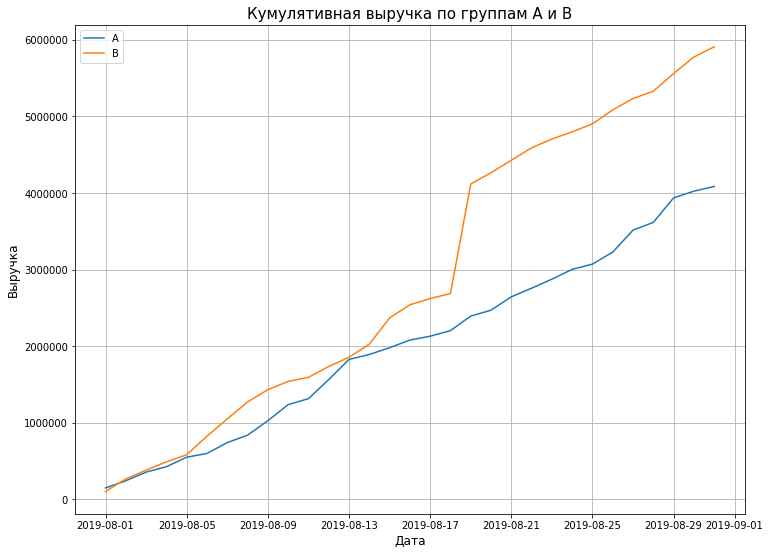

In [24]:
plt.figure(figsize=(12, 9))
plt.plot(orders_a_cumulative['date'], orders_a_cumulative['revenue_cumulative_a'], label='A')
plt.plot(orders_b_cumulative['date'], orders_b_cumulative['revenue_cumulative_b'], label='B')
plt.title('Кумулятивная выручка по группам А и В', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid()
plt.legend();

График кумулятивной выручки говорит о следующем:
1. Кумулятивная выручка группы А уступает показателям группы В. При этом, накопление более равномерное, что говорит об отсутствии значительных выборосов в выборке;
2. Кумулятивная выручка группы В на протяжении всего теста опережает показатели группы А, но на графике видны скачки, которые могли исказить общую картину.

#### Построить график кумулятивного среднего чека по группам <a id="step7"></a>

На основе данных в таблицах orders_a_cumulative и orders_b_cumulative посчитаем кумулятивный средний чек. Для этого, разделим выручку revenue_cumulative на заказы orders_cumulative

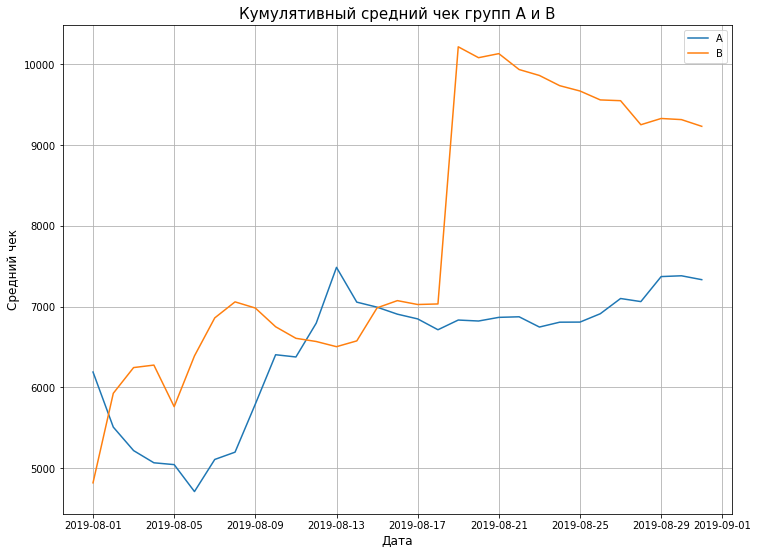

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(orders_a_cumulative['date'], 
         orders_a_cumulative['revenue_cumulative_a']/orders_a_cumulative['orders_cumulative_a'], label='A')
plt.plot(orders_b_cumulative['date'], 
         orders_b_cumulative['revenue_cumulative_b']/orders_b_cumulative['orders_cumulative_b'], label='B')
plt.title('Кумулятивный средний чек групп А и В', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
plt.grid()
plt.legend();

Колебание показателя подтверджают налчиие выбросов в исходных данных. Для получения точных результатов требуется исследовать чистые данные.

#### Построить график относительного изменения кумулятивного среднего чека группы В к группе А <a id="step8"></a>

Для этого, объединим таблицы orders_a_cumulative и orders_b_cumulative

In [26]:
merged_cumulative_revenue = orders_a_cumulative.merge(
    orders_b_cumulative, left_on='date', right_on='date', how='left')

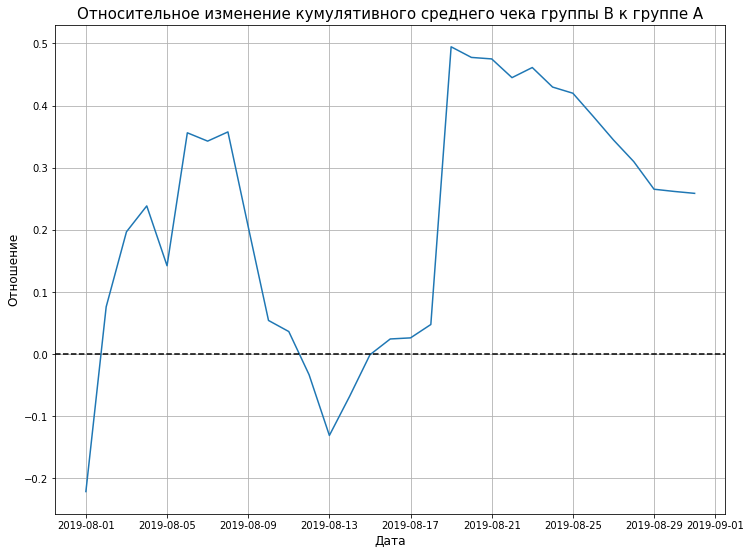

In [27]:
plt.figure(figsize=(12, 9))
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenue_cumulative_b']/merged_cumulative_revenue['orders_cumulative_b'])/(merged_cumulative_revenue['revenue_cumulative_a']/merged_cumulative_revenue['orders_cumulative_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение', fontsize=12)
plt.grid();

Относительное изменение кумулятивного среднего чека указывает на аномальные скачки между соотношением чеков, что также подтверждает аномальные данные в исходной таблице

#### Построить график кумулятивной конверсии по группам <a id="step9"></a>

Для решения добавим к данных таблицы orders кумулятивное количество посещений из таблицы visitors по каждой группе

In [28]:
visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitors_per_date_a']

In [29]:
visitors_a_cumulative = visitors_a.apply(
    lambda x: visitors_a[visitors_a['date'] <= x['date']].agg({'date':'max', 'visitors_per_date_a':'sum'}), axis=1)
visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']

In [30]:
visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitors_per_date_b']

In [31]:
visitors_b_cumulative = visitors_b.apply(
    lambda x: visitors_b[visitors_b['date'] <= x['date']].agg({'date':'max', 'visitors_per_date_b':'sum'}), axis=1)
visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

In [32]:
data_cumulative_a = orders_a_cumulative.merge(visitors_a_cumulative, left_on='date', right_on='date')

In [33]:
data_cumulative_a['conversion'] = data_cumulative_a['orders_cumulative_a'] / data_cumulative_a['visitors_cumulative_a']

In [34]:
data_cumulative_b = orders_b_cumulative.merge(visitors_b_cumulative, left_on='date', right_on='date')

In [35]:
data_cumulative_b['conversion'] = data_cumulative_b['orders_cumulative_b'] / data_cumulative_b['visitors_cumulative_b']

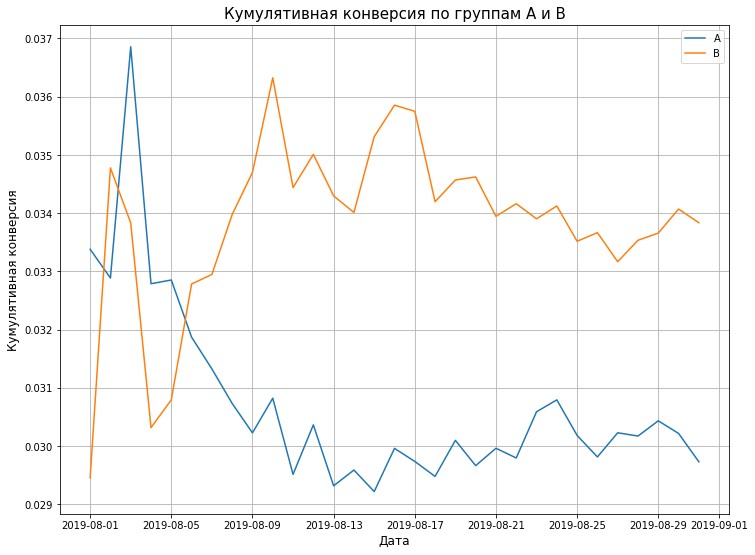

In [36]:
plt.figure(figsize=(12, 9))
plt.plot(data_cumulative_a['date'], data_cumulative_a['conversion'], label='A')
plt.plot(data_cumulative_b['date'], data_cumulative_b['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам А и В', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная конверсия', fontsize=12)
plt.grid()
plt.legend();

Динамика кумулятивной конверсии по группам А и В показывает, что практически сразу кумулятивное значение группы В оторвалось от значения группы А и сохранило свое преимущество на протяжении всего теста. По группе В значение установилось на уровне 0.34, когда как у группы А - 0.3

#### Построить график относительного изменения кумулятивной конверсии группы В к группе А <a id="step10"></a>

Также, как и со средним чеком, рассмотрим относительное изменение кумулятивной конверсии групп А и В

In [37]:
merged_cumulative_conversions = data_cumulative_a[['date', 'conversion']].merge(
    data_cumulative_b[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

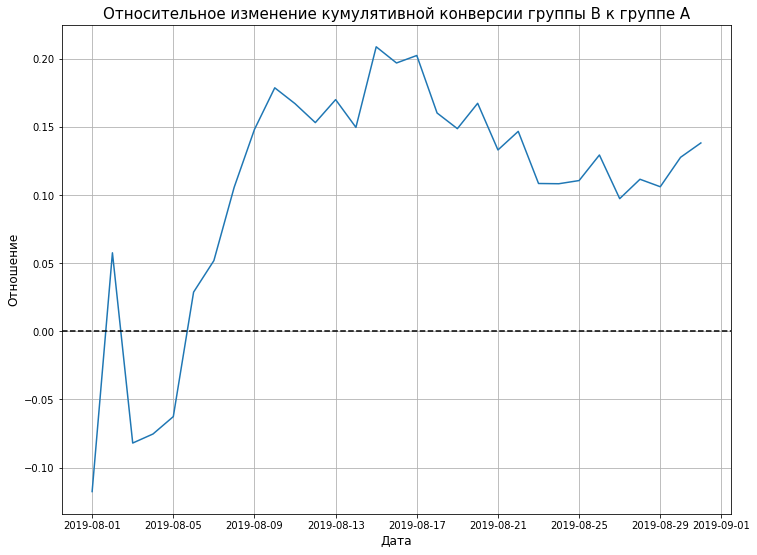

In [38]:
plt.figure(figsize=(12, 9))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение', fontsize=12)
plt.grid();

Практически сразу кумулятивная конверсия группы В превысила показатель группы А. В конце теста конверсия группы В превысила на 15%

#### Построить точечный график количества заказов по пользователям <a id="step11"></a>

Объединим данные в одну таблицу data_cumulative и построим точечный график

In [39]:
orders_by_users = (orders
                   .drop(['date', 'revenue', 'group'], axis=1)
                   .groupby('visitorId', as_index=False)
                   .agg({'transactionId': pd.Series.nunique})
                  )

In [40]:
orders_by_users.columns = ['user_id', 'orders']

In [41]:
orders_by_users.sort_values('orders', ascending=False).head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


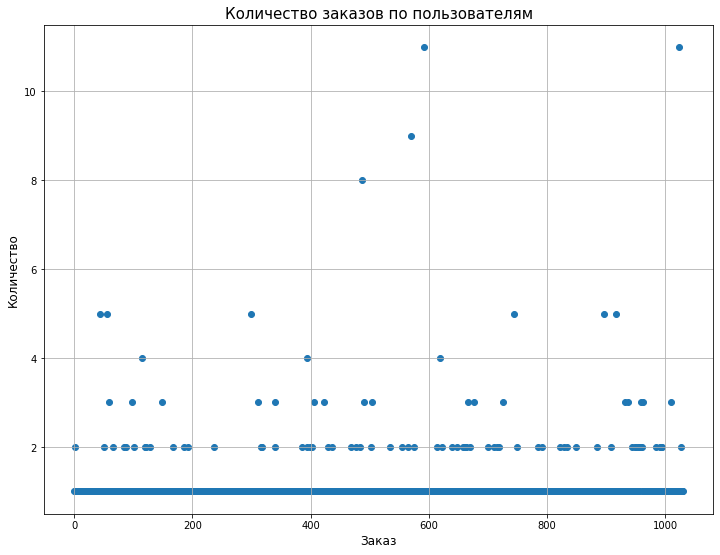

In [42]:
orders_scatter = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(12, 9))
plt.scatter(orders_scatter, orders_by_users['orders'])
plt.title('Количество заказов по пользователям', fontsize=15)
plt.xlabel('Заказ', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid();

Визуальные данные показывают, что большинство пользователей сделали от 1 до 2 заказов. Перепроверим эту информацию с помощью персентилей

#### Посчитать 95 и 99 персентили количества заказов на пользователя и определить границу аномальных пользователей <a id="step12"></a>

In [43]:
np.percentile(orders_by_users['orders'], [80, 90, 95, 99])

array([1., 1., 2., 4.])

Данные по персентилям подветрждают информацию с графиков - более 2 заказов осуществляли аномальные пользователи

#### Построить точечный график стоимостей заказов <a id="step13"></a>

In [44]:
revenue_scatter = pd.Series(range(0, len(orders['revenue'])))

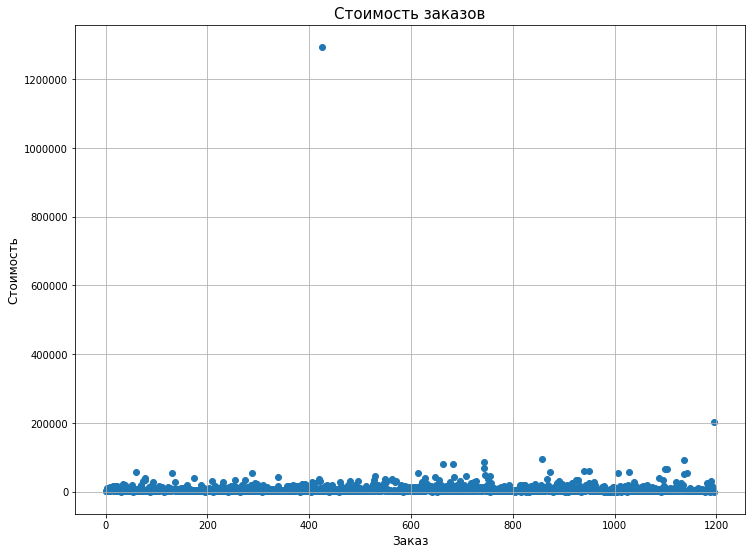

In [45]:
plt.figure(figsize=(12, 9))
plt.scatter(revenue_scatter, orders['revenue'])
plt.title('Стоимость заказов', fontsize=15)
plt.xlabel('Заказ', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)
plt.grid();

Точечный график указывает, что основная часть заказов меньше 100 000

#### Посчитать 95 и 99 персентили стоимости заказов и определить границу аномальных пользователей <a id="step14"></a>

In [46]:
np.percentile(orders['revenue'], [80, 90, 95, 99])

array([10239. , 18168. , 28000. , 58233.2])

95 персентиль - 28000, значения больше следует считать аномальными

#### Посчитать статистичкскую значимость различий в конверсии между группами по "сырым" данным <a id="step15"></a>

- Нулевая гипотеза: статистической разницы между конверсиями группы А и В нет
- Альтернативная гипотеза: существует разница между конверсиями группы А и В

Создадим переменный, в которых укажем количество заказов для каждого пользователя из групп. Для пользователей без заказа количество будет ноль

In [47]:
orders_by_users_a = (orders[orders['group'] == 'A']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId':pd.Series.nunique})
                    )
orders_by_users_a.columns = ['user_id', 'orders']

In [48]:
orders_by_users_b = (orders[orders['group'] == 'B']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId':pd.Series.nunique})
                    )
orders_by_users_b.columns = ['user_id', 'orders']

In [49]:
sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(
    visitors_a['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

In [50]:
sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(
    visitors_b['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

In [51]:
stats.mannwhitneyu(sample_a, sample_b)[1]

0.008396177528376304

In [52]:
sample_b.mean()/sample_a.mean()-1

0.13807884655320146

P-value оказалось меньше 0.05 и составило 0.008. Таким образом, согласно "сырым" данным, есть основание отвергнуть нулевую гипотезу о равенстве конверсий между группами А и В.
При этом, средняя конверсия по группе В выше на 13,8%, что подвтерждает вышеприведенные выводы. 
Таким образом, по "сырым" данным можно утверждать о наличии разницы в конверсии между двумя группами.

#### Посчитать статистичкскую значимость различий в среднем чеке между группами по "сырым" данным <a id="step16"></a>

- Нулевая гипотеза: статистической разницы между средними чеками группы А и В нет
- Альтернативная гипотеза: существует разница между средними чеками группы А и В

Аналогично выполним рассчет среднего чека

In [53]:
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.3646454927716229

In [54]:
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

0.2587136699126005

В данному случае, тест Манна-Уитни показал, что нет оснований отвергать нулевую гипотезу, так как P-value значительно больше альфа. Не смотря на это, средний чек группы всё таки оказался выше на 25.9%

Алгоритм работы теста Манна-Уитни
- Выборки ранжируются от меньшему к большему
- Сравниваются ранги полученных значений
- Выявляются типичные и нетипичные сдвиги
- Сумма рангов нетипичных сдвигов будет служить значением критерия

#### Посчитать статистичкскую значимость различий в конверсии между группами по чистым данным <a id="step17"></a>

- Нулевая гипотеза: статистической разницы между конверсиями группы А и В нет
- Альтернативная гипотеза: существует разница между конверсиями группы А и В

Для определения чистых данных найдем пользователей по аномальным значениям и исключим их из проверочной группы

In [55]:
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
                                 orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']], axis = 0)

In [56]:
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

In [57]:
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], 
                           axis = 0).drop_duplicates().sort_values()

Теперь исключим значения из списка abnormal_users в данных списка sample_a и sample_b

In [58]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id']
                            .isin(abnormal_users))]['orders'], pd.Series(0, index=np.arange(visitors_a['visitors_per_date_a']
                            .sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

In [59]:
sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id']
                            .isin(abnormal_users))]['orders'], pd.Series(0, index=np.arange(visitors_b['visitors_per_date_b']
                            .sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

In [60]:
stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

0.006521296371518379

In [61]:
sample_b_filtered.mean()/sample_a_filtered.mean() - 1

0.17270102073526417

Чистые данные не привели к значительному изменению результатов теста Манна-Уитни. Теперь p-value составило 0.006, что также меньше уровня значимости в 0.05. Таким образом, у нас есть основание отвергнуть гипотезу о равенстве конверсий между группами А и В. 
Стоит заметить, что разница между средними показала противоположный результат тесту с "сырыми" данными и говорит о том, что конверсия по группе А выше в период теста.

Вывод 2.0

Проверка равенства конверсии по чистым данным показала, что значение p-value 0.006 и оно меньше заданного уровня значимости в 5%. В результате, у есть основание отвергнуть нулевую гипотезу и предположить, что есть разница между конверсиями группы А и В.
Средняя конверсия группы B по чистым данным оказалась еще выше, чем конверсия группы А на 17.2%

#### Посчитать статистичкскую значимость различий в среднем чеке между группами по чистым данным <a id="step18"></a>

- Нулевая гипотеза: статистической разницы между средними чеками группы А и В нет
- Альтернативная гипотеза: существует разница между средними чеками группы А и В

Рассмотрим равенство средних чеков по чистым данным

In [62]:
stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
                                         np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'], 
                   orders[np.logical_and(orders['group']=='B',
                                         np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]

0.3692408756572825

In [63]:
orders[np.logical_and(orders['group']=='B', np.logical_not(
    orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() / orders[np.logical_and(orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1

-0.019624288331982598

Результат применения теста Манна-Уитни на чистых данных свидетельствуют о том, что нет оснований отвергать нулевую гипотезу о равенстве средних чеков групп А и В. 
При этом, данные по относительной разнице между средними указывают, что средний чек группы А на 1.9% больше чека группы В, что в целом соответствует приведенному выше выводу.

#### Сделать выводы и принять решение <a id="step19"></a>

Таким образом, по результатам проекта можно сделать следующие выводы:
1. Согласно фреймворку ICE наилучшей для проверки является 8 гипотеза;
2. Фреймворк RICE указывает, что наилучшей для проверки будет 7 гипотеза;
3. Кумулятивная выручка группы А уступает показателям группы В. При этом, накопление более равномерное, что говорит об отсутствии значительных выборосов в выборке;
4. Кумулятивная выручка группы В на протяжении всего теста опережает показатели группы А, но на графике видны скачки, которые могли исказить общую картину;
5. Динамика кумулятивной конверсии по группам А и В показывает, что практически сразу кумулятивное значение группы В оторвалось от значения группы А и сохранило свое преимущество на протяжении всего теста. По группе В значение установилось на уровне 0.34, когда как у группы А - 0.3;
6. Тест Манна-Уитни по конверсии, сырые данные. P-value оказалось меньше 0.05 и составило 0.008. Таким образом, есть основание отвергнуть нулевую гипотезу о равенстве конверсий между группами А и В;
7. Сравнение средних конверсий, сырые данные. Средняя конверсия по группе В выше на 13,8%, что подвтерждает вышеприведенные выводы;
8. Тест Манна-Уитни по среднему чеку, сырые данные. В данному случае, тест Манна-Уитни показал, что нет оснований отвергать нулевую гипотезу, так как P-value значительно больше альфа;
9. Сравнение средних чеков, сырые данные. Средний чек группы В всё таки оказался выше на 25.9%;
10. Тест Манна-Уитни по конверсии, чистые данные. Чистые данные не привели к значительному изменению результатов теста Манна-Уитни. Теперь p-value составило 0.006, что также меньше уровня значимости в 0.05. Таким образом, у нас есть основание отвергнуть гипотезу о равенстве конверсий между группами А и В;
11. Сравнение средних конверсий, чистые данные. Разница между средними показала противоположный результат тесту с "сырыми" данными и говорит о том, что конверсия по группе А выше в период теста;
12. Тест Манна-Уитни по среднему чеку, чистые данные. Результат применения теста Манна-Уитни на чистым данных свидетельствует о том, что нет оснований отвергать нулевую гипотезу о равенстве средних чеков групп А и В. 
13. Сравнение средних чеков, чистые данные. Данные по относительной разнице между средними указывают, что средний чек группы А на 1.9% больше чека группы В, что в целом соответствует приведенному выше выводу.

В результате полученных данных, следует заключить, что тест можно остановить - группа В показывает лучшие результаты в компоненте конверсии.